In [1]:
import sys
sys.path.append('/home/jovyan/workspace')

In [2]:
%%sh
rm -rf '../data/test'

In [3]:
import planetengine

In [4]:
import underworld as uw
from underworld import function as fn

In [5]:
model = planetengine.frame.make_frame(
    planetengine.systems.arrhenius.build(res = 16, f = 1.),
    {'temperatureField': planetengine.initials.sinusoidal.IC()},
    outputPath = '../data/test'
    )

Making a new frame...
Making stamps...
Stamps made.
Building frame...
Making stamps...
Stamps made.
Loading interior frames...
Loaded 0 interior frames.
Fitted 1 variables to the figure.
Initialising...
Initialisation complete!
Frame built!
Frame made.


In [6]:
myfn = planetengine._functions.Merge(
    model.system.temperatureField,
    planetengine._functions.Normalise(model.system.viscosityFn, model.system.temperatureField)
    )

/home/jovyan/workspace/planetengine/utilities.py:297: RuntimeWarning: invalid value encountered in double_scalars
  ranges = np.array([maxVal - minVal for minVal, maxVal in scales])


Fitted 1 variables to the figure.
Merge{Variable_varName=anon{};Normalise{Variable_varName=anon{};Variable_varName=anon{}}} [[ 0.  1.]
 [ 0.  1.]]



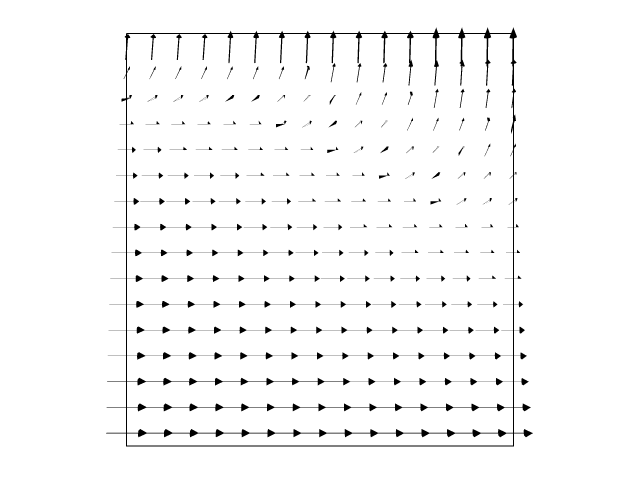

In [7]:
planetengine.quickShow(
    myfn
    )

In [8]:
for i in range(10):
    model.iterate()

Iterating step 0 ...
Iteration complete!
Iterating step 1 ...
Iteration complete!
Iterating step 2 ...
Iteration complete!
Iterating step 3 ...
Iteration complete!
Iterating step 4 ...
Iteration complete!
Iterating step 5 ...
Iteration complete!
Iterating step 6 ...
Iteration complete!
Iterating step 7 ...
Iteration complete!
Iterating step 8 ...
Iteration complete!
Iterating step 9 ...
Iteration complete!


In [9]:
rotated = planetengine._functions.Merge.AnnularVectors(model.system.velocityField)

Fitted 1 variables to the figure.
Variable_varName=anon{} [[-1682.91703943   587.19688122]
 [ -394.95506887  1346.04891561]]



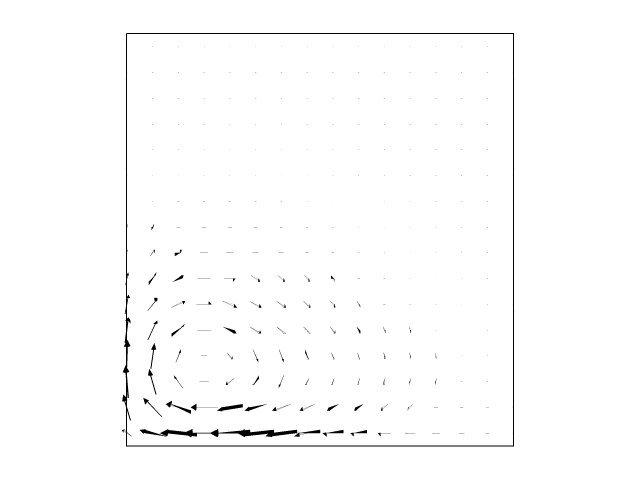

In [10]:
planetengine.quickShow(
    model.system.velocityField
    )

Fitted 1 variables to the figure.
Merge{Component_component=ang{Variable_varName=anon{}};Component_component=rad{Variable_varName=anon{}}} [[-1682.91715219   587.19734998]
 [-1346.04891563   394.95510385]]



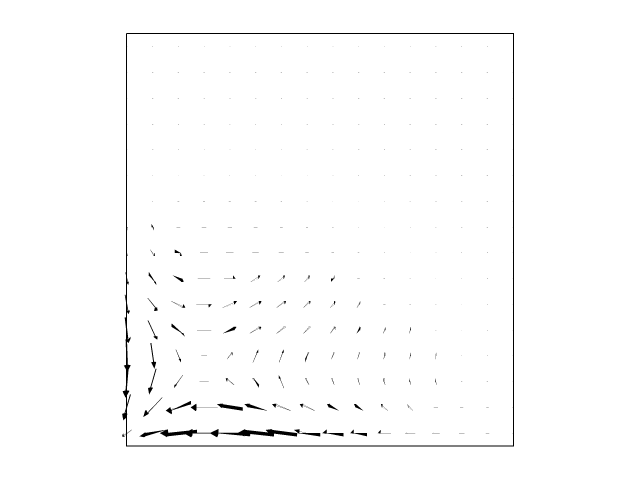

In [11]:
planetengine.quickShow(
    rotated
    )

In [ ]:
planetengine.quickShow(
    planetengine._functions.Component(model.system.velocityField, 'ang')
    )

In [ ]:
planetengine.quickShow(
    model.system.temperatureField,
    model.system.velocityField,
    model.system.viscosityFn
    )

In [ ]:
s

In [ ]:
model.system.mesh.add_variable

In [ ]:
model.system.velocityField.data[:,0] = model.system.temperatureField.data[:,0]

In [ ]:
import underworld as uw
from underworld import function as fn
import math
import time
import glucifer
import numpy as np
import math

import planetengine
from planetengine.utilities import Grouper
from planetengine import analysis
from planetengine import visualisation

def build(obsVars, step, modeltime):

    ### HOUSEKEEPING: IMPORTANT! ###

#     inputs = locals().copy()
    inputs = {'obsVars': sorted(obsVars.keys())}
    script = __file__

    ### MAKE STATS ###

    statsDict = {}
    formatDict = {}

    for varName, var in sorted(obsVars.items()):

        pevar = planetengine.standardise(var)
        var = pevar.var

        standardIntegralSuite = {
            'surface': ['volume', 'inner', 'outer'],
            'comp': ['mag', 'ang', 'rad'],
            'gradient': [None, 'ang', 'rad']
            }

        for inputDict in planetengine.utilities.suite_list(standardIntegralSuite):

            anVar = analysis.Analyse.StandardIntegral(
                var,detected_meshes
                **inputDict
                )
            statsDict[varName + '_' + anVar.opTag] = anVar

            formatDict[varName + '_' + anVar.opTag] = "{:.2f}"

    zerodAnalyser = analysis.Analyser(
        'zerodData',
        statsDict,
        formatDict,
        step,
        modeltime
        )
    analysers = [zerodAnalyser,] # MAGIC NAME: MUST BE DEFINED

    maincollector = analysis.DataCollector(analysers)
    collectors = [maincollector,] # MAGIC NAME: MUST BE DEFINED

    ### FIGS ###

    mainfig = visualisation.QuickFig(
        *sorted(obsVars.items()),
        figname = 'standard'
        )
    figs = [mainfig,] # MAGIC NAME: MUST BE DEFINED

    ### HOUSEKEEPING: IMPORTANT! ###

    return Grouper(locals())